# Projeto de Inteligência Artificial

## Regressão linear

#### Nesse Projeto usamos um banco de dados simples, com dados de 365 de uma zona universitária, estudando o consumo de cerveja de pessoas de 18 a 28 anos de idade, também armazenando os dados do clima do dia para se ter uma noção se isso tem alguma correlação. Foi usado as bibliotecas pandas, scikit learn, pandas_profiling, esse primeiro é usado como uma biblioteca para análise e pré-processamento de dados, a segunda é usada para treinamento e teste de modelos, assim como validação e verificação de resultados, já a última é uma biblioteca onde se tem um relatório geral dos dados do dataset


In [17]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib as plt

df = pd.read_csv('Consumo_cerveja.csv')

df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1,29.799
4,2015-01-05,"23,82",21,"28,3",0,0,28.900


## Pré Processamento

#### Foi retirada a coluna 'Data' pois essa não tem valor algum para o modelo, são valores ordinais sem qualquer relevância para a a máquina. O banco estava com um problema nas colunas "Temperatura Media (C)","Temperatura Minima (C)","Temperatura Maxima (C)","Precipitacao (mm)" logo foi preciso acessa-las individualmente e transformar seus valores em float para ter representatividade para a máquina, como String seriam apenas valores sem sentido algum, e iriam apenas atrapalhar na regressão.

In [18]:
data = df.drop(columns = 'Data')

colunas = ["Temperatura Media (C)","Temperatura Minima (C)","Temperatura Maxima (C)","Precipitacao (mm)"]

for i in range(len(data["Consumo de cerveja (litros)"])):
        data.loc[i, "Consumo de cerveja (litros)"] = int(data.loc[i, "Consumo de cerveja (litros)"] * 1000) 


for c in colunas:
    for i in range(len(data[c])):
        data.loc[i, c] = float(data.loc[i, c].replace(",","."))
        
for c in colunas:
    data[c] = pd.to_numeric(data[c])
        
data.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0,25461.0
1,27.02,24.5,33.5,0.0,0,28971.0
2,24.82,22.4,29.9,0.0,1,30814.0
3,23.98,21.5,28.6,1.2,1,29799.0
4,23.82,21.0,28.3,0.0,0,28900.0


## Análise

#### Aqui se tem a cara do Dataset, usando o .info(), temos o número de amostras, o total de colunas, assim como seus tipos, e até o uso de memória para armazena-lo, abaixo foi printado a média da coluna alvo, para se ter um norte nos resultados.

In [19]:
data.info()
print(data['Consumo de cerveja (litros)'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
Temperatura Media (C)          365 non-null float64
Temperatura Minima (C)         365 non-null float64
Temperatura Maxima (C)         365 non-null float64
Precipitacao (mm)              365 non-null float64
Final de Semana                365 non-null int64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(5), int64(1)
memory usage: 17.2 KB
25401.208219178083


#### Aqui foi printado a matriz de correlação, onde temos as informações mais importantes para uma regressão, ao saber o nível de correlação entre as colunas e o valor alvo, temos noção de quais características irão ajudar ou atrapalhar, assim podemos retirar ou manter características dependendo de sua correlação, abaixo se ve que a coluna 'Precipitação (mm)', tem uma correlação negativa com a coluna alvo, e é sensato retira-la, mas como ainda é uma coluna relevante foram feito os testes com e sem tal característica, quando a teve tiveram um R2 Score maior do que sem, isso se explica pois as médias influenciam no valor do Score, e como essa característica tem muitos zeros, trouxe a média para baixo e o valor do R2 para cima, pois ela é usada no dividendo e quanto menor maior será o Score, já na medida de média de erro absoluta tivemos uma diminuição no valor dos erros quando essa característica foi retirada, mostrando que sua correlação negativa estava realmente atrapalhando nos resultados finais, e também mostrando que o R2 não é uma medida tão confiável para regressão.

In [20]:
data.corr(method='spearman')

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.864661,0.912867,0.017111,-0.039258,0.570003
Temperatura Minima (C),0.864661,1.000000,0.664436,0.166770,-0.050208,0.391503
Temperatura Maxima (C),0.912867,0.664436,1.000000,-0.116672,-0.023907,0.641289
Precipitacao (mm),0.017111,0.166770,-0.116672,1.000000,0.003799,-0.172398
Final de Semana,-0.039258,-0.050208,-0.023907,0.003799,1.000000,0.497192
Consumo de cerveja (litros),0.570003,0.391503,0.641289,-0.172398,0.497192,1.000000


#### Analisando os gráficos das características e da coluna alvo, se vê um comportamento parecido porém com uma alta variação no consumo de cerveja do domingo para a segunda, com altas quedas no consumo na segunda, retratando um ciclo repetitivo semana após semana, atigindo seus picos nos fins de semana, e voltando a subir durante o meio de semana, também se vê as temperaturas maiores no começo do ano assim como o consumo de cerveja, isso é importante para a regressão pois tem comportamentos parecidos.

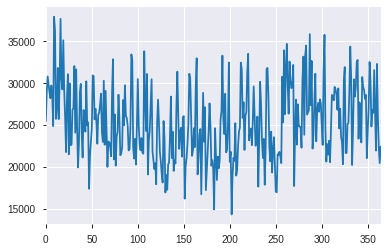

In [21]:
data["Consumo de cerveja (litros)"].plot()

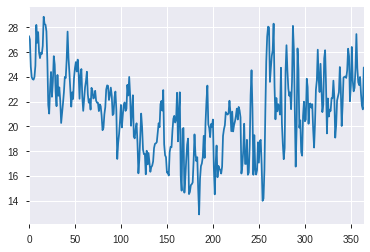

In [22]:
data["Temperatura Media (C)"].plot()

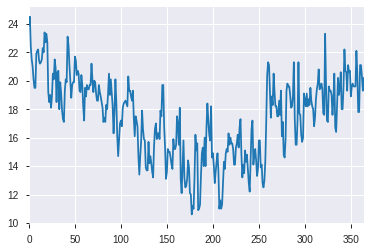

In [23]:
data["Temperatura Minima (C)"].plot()

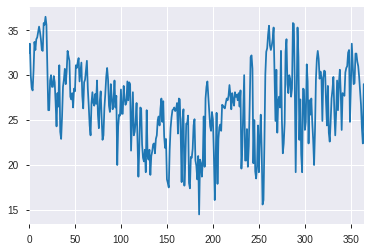

In [24]:
data["Temperatura Maxima (C)"].plot()

#### Analisando os boxplot das características temos um comportamento estranho na característica Precipitacap (mm), onde está tem uma média e mediana muito baixa, transformando a maioria dos valores em outliers, é uma característica difícil de entender pelo boxsplot, mas já foi retratado o tratamento para esse caso, também verificamos que nas colunas Temperatura Media e Temperatura Minima, temos bloxplots consistentes, com uma variância mais baixa que as outras duas colunas, onde se percebe uma alta variância acima e abaixo de 75% e 25% dos valores.

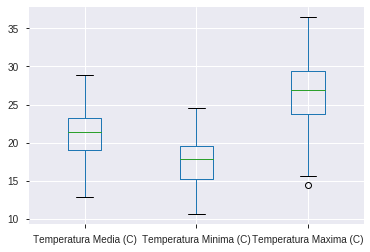

In [25]:
data.boxplot(column = ['Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)'])

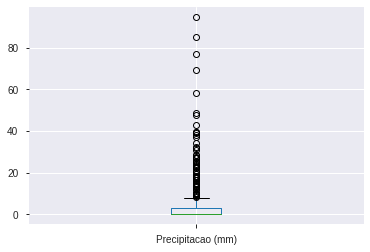

In [26]:
data.boxplot(column = ['Precipitacao (mm)'])

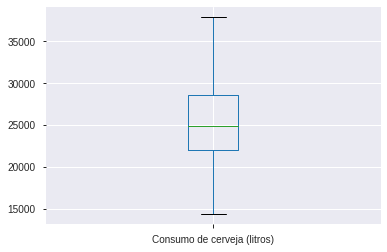

In [27]:
data.boxplot(column = ['Consumo de cerveja (litros)'])

#### Nesse gráfico temos os valores do Consumo de cerveja, separados para quando é final de semana ou não, se percebe que os valores azuis, ou seja, dos finais de semana se sobresaem em muitos dias do ano, assim essa é uma característica de extrema importância para essa regressão linear.

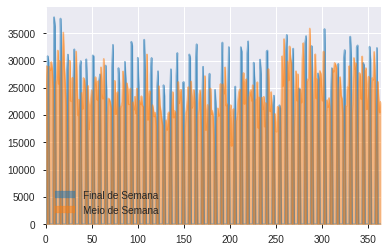

In [28]:
data1 = data.copy()
data2 = data.copy()

indexNames1 = data[data['Final de Semana'] == 0].index
indexNames2 = data[data['Final de Semana'] == 1].index

data1.drop(indexNames1, inplace = True)
data2.drop(indexNames2, inplace = True)


df = pd.DataFrame(
     {'Final de Semana': data1['Consumo de cerveja (litros)'],
     'Meio de Semana' : data2['Consumo de cerveja (litros)']})
                             
df.plot.area(stacked = False)
                             


## Treinamento e Teste

In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import median_absolute_error
MLP_data = data.copy()

MLP_output = MLP_data['Consumo de cerveja (litros)']
MLP_input = MLP_data.drop(columns = ['Consumo de cerveja (litros)'])


in_train, in_test, out_train, out_test = train_test_split(MLP_input, MLP_output, 
                                                          test_size = 0.2 ,random_state = 69)

MLP = MLPRegressor(max_iter = 100000)
MLP_model = MLP.fit(in_train, out_train)
MLP_predictions = MLP_model.predict(in_test)
MLP_score_test = MLP_model.score(in_test, out_test)
MLP_score_train = MLP_model.score(in_train, out_train)
print(MLP_score_train, MLP_score_test)


MLP_scores = cross_val_score(MLP, in_train, out_train, cv=10)
print(MLP_scores.mean())

print("Média Absoluta de Erros:",median_absolute_error(out_test, MLP_predictions))

frame = []

frame+= [['MLP Regressor',round(MLP_score_test,2),round(MLP_scores.mean(), 2),round(median_absolute_error(out_test, MLP_predictions),2)]]


0.6919266538683195 0.7067044252187433
0.597094847769823
Média Absoluta de Erros: 1720.6480298409224


In [30]:
from sklearn import linear_model

Linear = linear_model.LinearRegression()
Linear_model = Linear.fit(in_train, out_train)
Linear_predictions = Linear_model.predict(in_test)
Linear_score_test = Linear_model.score(in_test, out_test)
Linear_score_train = Linear_model.score(in_train, out_train)
print("Train Score:",Linear_score_train, "Test Score:",Linear_score_test)


Linear_scores = cross_val_score(Linear, in_train, out_train, cv=10)
print("Cross Score",Linear_scores.mean())

print("Média Absoluta de Erros:",median_absolute_error(out_test, Linear_predictions))

frame+= [['Linear Regression',round(Linear_score_test,2),round(Linear_scores.mean(),2),round(median_absolute_error(out_test, Linear_predictions),2)]]

Train Score: 0.7188879268499222 Test Score: 0.7296973748319979
Cross Score 0.6798148822343404
Média Absoluta de Erros: 1705.909279526284


In [31]:
Bayes = linear_model.BayesianRidge()
Bayes_model = Bayes.fit(in_train, out_train)
Bayes_predictions = Bayes_model.predict(in_test)
Bayes_score_test = Bayes_model.score(in_test, out_test)
Bayes_score_train = Bayes_model.score(in_train, out_train)

Bayes_scores = cross_val_score(Bayes, in_train, out_train, cv=10)

print("Train Score:",Bayes_score_train, "Test Score:",Bayes_score_test)

print("Cross Score",Bayes_scores.mean())
print("Média Absoluta de Erros:",median_absolute_error(out_test, Linear_predictions))

frame+= [['Bayes Regression',round(Bayes_score_test,2),round(Bayes_scores.mean(),2),round(median_absolute_error(out_test, Bayes_predictions),2)]]

Train Score: 0.7188071087474317 Test Score: 0.7319270042009656
Cross Score 0.6799206617069571
Média Absoluta de Erros: 1705.909279526284


In [32]:
from sklearn.ensemble import RandomForestRegressor

Trees = RandomForestRegressor(
    max_depth = 5,
    n_estimators = 100,
)
Trees_model = Trees.fit(in_train, out_train)
Trees_predictions = Trees_model.predict(in_test)
Trees_score_test = Trees_model.score(in_test, out_test)
Trees_score_train = Trees_model.score(in_train, out_train)
Trees_scores = cross_val_score(Trees, in_train, out_train, cv=10)

print("Train Score:",Trees_score_train, "Test Score:",Trees_score_test)
print("Cross Score",Trees_scores.mean())
print("Média Absoluta de Erros:",median_absolute_error(out_test, Trees_predictions))

frame+= [['Random Forest Regressor',round(Trees_score_test, 2),round(Trees_scores.mean(),2),round(median_absolute_error(out_test, Trees_predictions),2)]]

Train Score: 0.8140250458652257 Test Score: 0.6939590932605048
Cross Score 0.6087946640753918
Média Absoluta de Erros: 1791.433845789823


In [33]:
from sklearn.neighbors import KNeighborsRegressor

Neigh = KNeighborsRegressor(n_neighbors = 2, weights = 'distance', algorithm = 'auto')
Neigh_model = Neigh.fit(in_train, out_train)
Neigh_predictions = Neigh_model.predict(in_test)
Neigh_score_test = Neigh_model.score(in_test, out_test)
Neigh_score_train = Neigh_model.score(in_train, out_train)
Neigh_scores = cross_val_score(Neigh, in_train, out_train, cv=10)

print("Train Score:", Neigh_score_train, "Test Score:",Neigh_score_test)
print("Cross Score", Neigh_scores.mean())
print("Média Absoluta de Erros:", median_absolute_error(out_test, Neigh_predictions))

frame+= [['KNeighbors Regressor',round(Neigh_score_test,2),round(Neigh_scores.mean(),2),round(median_absolute_error(out_test, Neigh_predictions),2)]]

Train Score: 1.0 Test Score: 0.5170458947077814
Cross Score 0.26514187546018697
Média Absoluta de Erros: 1727.3063260034323


## Teste com Dados do Dia

In [34]:
New = [[27,22,29,0,0]]

NewPrediction = MLP_model.predict(New)

print("Consumo de Cerveja:",round(NewPrediction[0], 3))

Consumo de Cerveja: 27210.538


In [35]:
df = pd.DataFrame(frame,columns = ['Algoritmo','Score', 'Cross Score', 'Média de Erro Absoluto'])
df

,Algoritmo,Score,Cross Score,Média de Erro Absoluto
0,MLP Regressor,0.71,0.60,1720.65
1,Linear Regression,0.73,0.68,1705.91
2,Bayes Regression,0.73,0.68,1748.75
3,Random Forest Regressor,0.69,0.61,1791.43
4,KNeighbors Regressor,0.52,0.27,1727.31


In [36]:
MLP_data = data.copy()

MLP_output = MLP_data['Consumo de cerveja (litros)']
MLP_input = MLP_data.drop(columns = ['Consumo de cerveja (litros)','Precipitacao (mm)'])


in_train, in_test, out_train, out_test = train_test_split(MLP_input, MLP_output, 
                                                          test_size = 0.2 ,random_state = 69)

MLP = MLPRegressor(max_iter = 100000)
MLP_model = MLP.fit(in_train, out_train)
MLP_predictions = MLP_model.predict(in_test)
MLP_score_test = MLP_model.score(in_test, out_test)
MLP_score_train = MLP_model.score(in_train, out_train)
print(MLP_score_train, MLP_score_test)


MLP_scores = cross_val_score(MLP, in_train, out_train, cv=10)
print(MLP_scores.mean())

print("Média Absoluta de Erros:",median_absolute_error(out_test, MLP_predictions))

frame = []

frame+= [['MLP Regressor',round(MLP_score_test,2),round(MLP_scores.mean(), 2),round(median_absolute_error(out_test, MLP_predictions),2)]]


0.6784210331143758 0.6666329774064523
0.602213342106816
Média Absoluta de Erros: 1545.9673282999574


In [37]:
Linear = linear_model.LinearRegression()
Linear_model = Linear.fit(in_train, out_train)
Linear_predictions = Linear_model.predict(in_test)
Linear_score_test = Linear_model.score(in_test, out_test)
Linear_score_train = Linear_model.score(in_train, out_train)
print("Train Score:",Linear_score_train, "Test Score:",Linear_score_test)


Linear_scores = cross_val_score(Linear, in_train, out_train, cv=10)
print("Cross Score",Linear_scores.mean())

print("Média Absoluta de Erros:",median_absolute_error(out_test, Linear_predictions))

frame+= [['Linear Regression',round(Linear_score_test,2),round(Linear_scores.mean(),2),round(median_absolute_error(out_test, Linear_predictions),2)]]

Train Score: 0.6962909893574285 Test Score: 0.6929698904647559
Cross Score 0.6576586817819325
Média Absoluta de Erros: 1556.35332632071


In [38]:
Bayes = linear_model.BayesianRidge()
Bayes_model = Bayes.fit(in_train, out_train)
Bayes_predictions = Bayes_model.predict(in_test)
Bayes_score_test = Bayes_model.score(in_test, out_test)
Bayes_score_train = Bayes_model.score(in_train, out_train)

Bayes_scores = cross_val_score(Bayes, in_train, out_train, cv=10)

print("Train Score:",Bayes_score_train, "Test Score:",Bayes_score_test)

print("Cross Score",Bayes_scores.mean())
print("Média Absoluta de Erros:",median_absolute_error(out_test, Linear_predictions))

frame+= [['Bayes Regression',round(Bayes_score_test,2),round(Bayes_scores.mean(),2),round(median_absolute_error(out_test, Bayes_predictions),2)]]

Train Score: 0.6962310397781145 Test Score: 0.6947156968163959
Cross Score 0.6578513767518634
Média Absoluta de Erros: 1556.35332632071


In [39]:
Trees = RandomForestRegressor(
    max_depth = 5,
    n_estimators = 100,
)
Trees_model = Trees.fit(in_train, out_train)
Trees_predictions = Trees_model.predict(in_test)
Trees_score_test = Trees_model.score(in_test, out_test)
Trees_score_train = Trees_model.score(in_train, out_train)
Trees_scores = cross_val_score(Trees, in_train, out_train, cv=10)

print("Train Score:",Trees_score_train, "Test Score:",Trees_score_test)
print("Cross Score",Trees_scores.mean())
print("Média Absoluta de Erros:",median_absolute_error(out_test, Trees_predictions))

frame+= [['Random Forest Regressor',round(Trees_score_test, 2),round(Trees_scores.mean(),2),round(median_absolute_error(out_test, Trees_predictions),2)]]

Train Score: 0.8040576659562596 Test Score: 0.6424345099659714
Cross Score 0.5841915759068341
Média Absoluta de Erros: 1618.7639634232837


In [40]:
Neigh = KNeighborsRegressor(n_neighbors = 2, weights = 'distance', algorithm = 'auto')
Neigh_model = Neigh.fit(in_train, out_train)
Neigh_predictions = Neigh_model.predict(in_test)
Neigh_score_test = Neigh_model.score(in_test, out_test)
Neigh_score_train = Neigh_model.score(in_train, out_train)
Neigh_scores = cross_val_score(Neigh, in_train, out_train, cv=10)

print("Train Score:", Neigh_score_train, "Test Score:",Neigh_score_test)
print("Cross Score", Neigh_scores.mean())
print("Média Absoluta de Erros:", median_absolute_error(out_test, Neigh_predictions))

frame+= [['KNeighbors Regressor',round(Neigh_score_test,2),round(Neigh_scores.mean(),2),round(median_absolute_error(out_test, Neigh_predictions),2)]]

Train Score: 1.0 Test Score: 0.3861496551847078
Cross Score 0.3842339464121739
Média Absoluta de Erros: 1539.5077451928955


In [41]:
New = [[27,22,29,0]]

NewPrediction = MLP_model.predict(New)

print("Consumo de Cerveja:",round(NewPrediction[0], 3))

Consumo de Cerveja: 26453.306


In [42]:
df = pd.DataFrame(frame,columns = ['Algoritmo','Score', 'Cross Score', 'Média de Erro Absoluto'])
df

,Algoritmo,Score,Cross Score,Média de Erro Absoluto
0,MLP Regressor,0.67,0.60,1545.97
1,Linear Regression,0.69,0.66,1556.35
2,Bayes Regression,0.69,0.66,1568.29
3,Random Forest Regressor,0.64,0.58,1618.76
4,KNeighbors Regressor,0.39,0.38,1539.51
